<a href="https://colab.research.google.com/github/trsk3333/chatgpt/blob/main/TreszkaTamasMIHazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Házi feladat

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/diabetes.csv')

df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df.describe().loc['count']

,count
pregnant,768.0
glucose,768.0
bp,768.0
skin,768.0
insulin,768.0
bmi,768.0
pedigree,768.0
age,768.0
label,768.0


In [20]:
import numpy as np

# Replace 0 values with NaN in the specified columns
cols_to_replace_zero = ['bp', 'skin', 'insulin', 'bmi']
df[cols_to_replace_zero] = df[cols_to_replace_zero].replace(0, np.nan)

# Calculate the median for each of these columns and fill NaN values
for col in cols_to_replace_zero:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Display the first few rows of the modified DataFrame
display(df.head())

/tmp/ipython-input-3597472134.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
display(df.groupby('label').mean())

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,3.298000,109.980000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,141.257463,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


In [22]:
df_filtered = df[df['pregnant'] < 10]
display(df_filtered)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,29.0,125.0,22.5,0.142,33,0
764,2,122,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,29.0,125.0,30.1,0.349,47,1


In [23]:
!pip install seaborn matplotlib

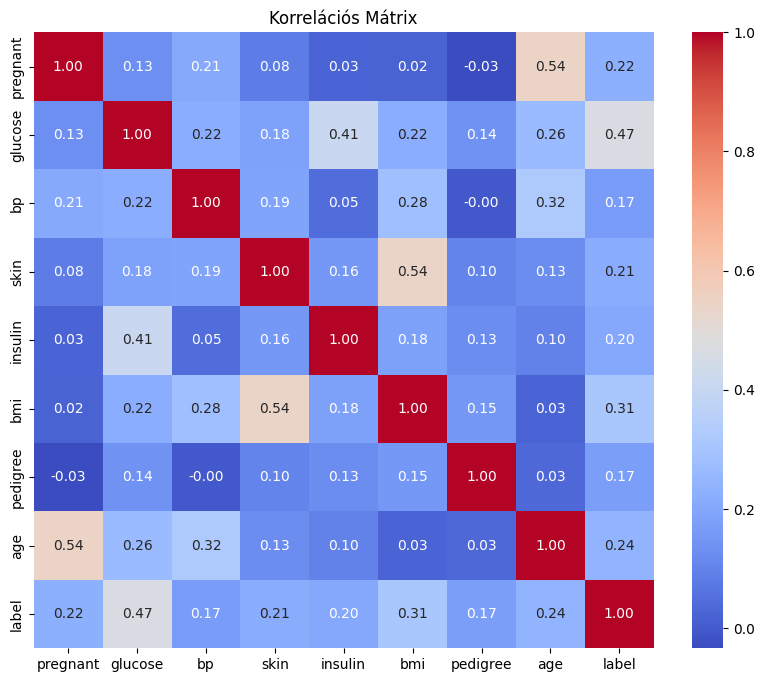

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelációs Mátrix')
plt.show()

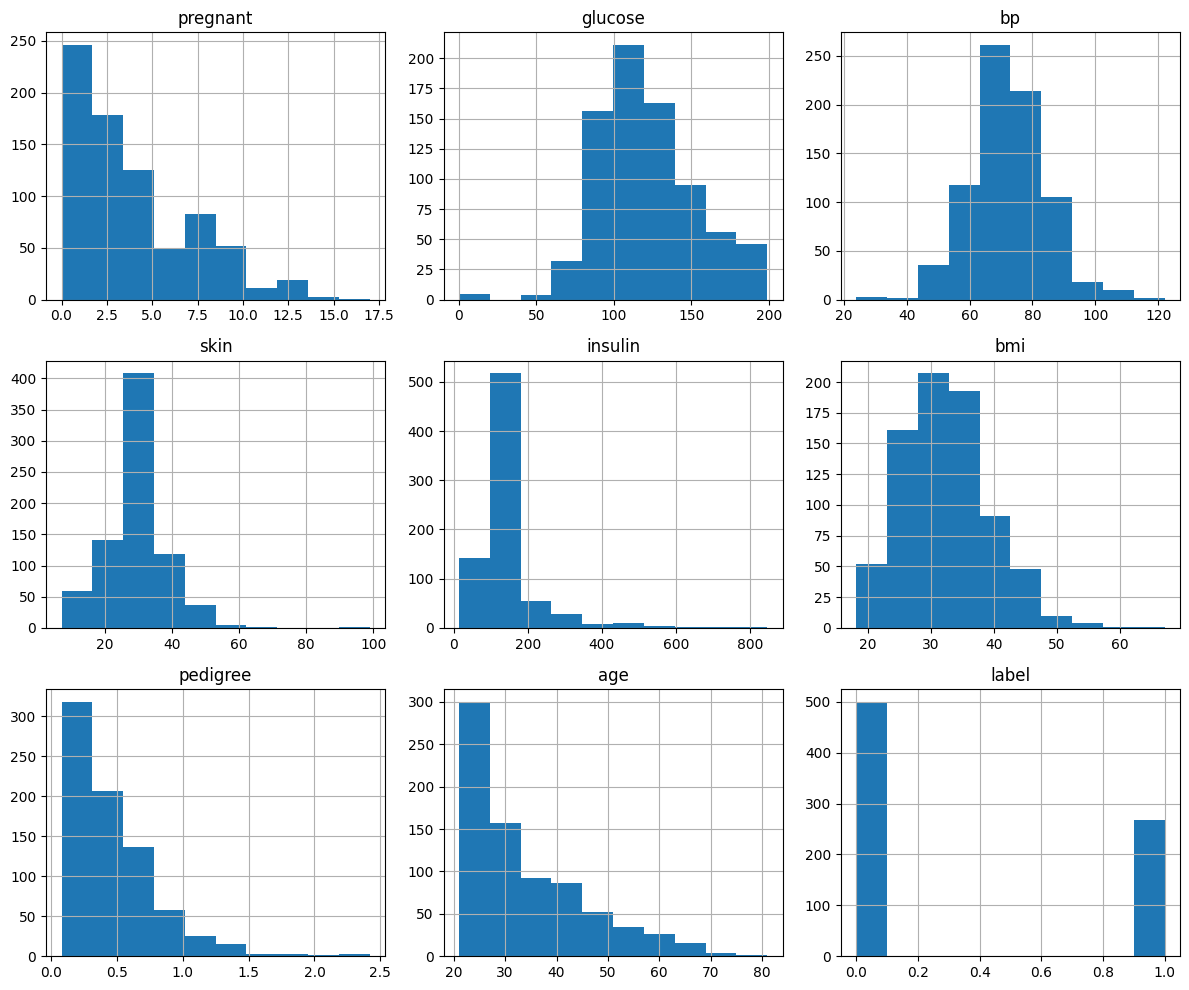

In [25]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

A Gemini válasza:

A hisztogramok alapján a következő eloszlásokat lehet felismerni az egyes oszlopokban:

*   **pregnant:** Jobbra ferde eloszlás (skewed right), a legtöbb érték 0 és 5 között van.
*   **glucose:** Nagyjából normális eloszlás (normal distribution), de van néhány kiugró érték a magasabb tartományban.
*   **bp (vérnyomás):** Nagyjából normális eloszlás, néhány érték 0 körül található, ami valószínűleg hiányzó vagy hibás adat.
*   **skin (bőrvastagság):** Jobbra ferde eloszlás, sok 0 értékkel, ami szintén hiányzó vagy hibás adatot jelezhet.
*   **insulin:** Erősen jobbra ferde eloszlás, nagyon sok 0 értékkel, ami szintén hiányzó vagy hibás adat lehet.
*   **bmi (testtömeg index):** Nagyjából normális eloszlás, néhány 0 értékkel, ami szintén hiányzó vagy hibás adat lehet.
*   **pedigree (cukorbetegség családi kórtörténet):** Erősen jobbra ferde eloszlás.
*   **age (kor):** Jobbra ferde eloszlás.
*   **label:** Binomiális eloszlás, mivel csak két lehetséges értéke van (0 vagy 1).
